In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
%matplotlib notebook
plt.style.use('seaborn-notebook')

data_1 = pd.read_excel(r'C:\\Users\\monis\\Desktop\\ML-Ang\\Data@ANZ\\ANZ synthesised transaction dataset.xlsx')
data_2 = pd.read_excel(r'C:\\Users\\monis\\Downloads\\ANZ synthesised transaction dataset.xlsx')
df1 = pd.DataFrame(data_2)

In [3]:
df1.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df1['date']

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]

In [6]:
df1.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
df1.groupby('date')['amount'].sum().sort_values(ascending=False)

date
2018-10-15    51943.08
2018-10-19    51252.75
2018-09-14    48736.97
2018-08-20    48240.34
2018-10-26    46451.05
                ...   
2018-08-19     4778.92
2018-08-05     4426.50
2018-08-12     4397.12
2018-08-26     4268.99
2018-10-20     4265.61
Name: amount, Length: 91, dtype: float64

In [8]:
print("Total number of transactions made each day in order of highest frequency:")
print(df1["date"].value_counts().head(), "\n")               # Remove .head() on this line for full count

print("Total number of transactions made by each customer in order of highest frequency:")
print(df1["customer_id"].value_counts().head(), "\n")     

Total number of transactions made each day in order of highest frequency:
2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
Name: date, dtype: int64 

Total number of transactions made by each customer in order of highest frequency:
CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
Name: customer_id, dtype: int64 



In [9]:
months = []
for date in df1["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

In [10]:
df1["Months"] = months

In [11]:
#what is the average transaction amount for each day, in each month
df1.groupby('Months')['amount'].mean().sort_values(ascending=False)

Months
October      196.427323
August       185.121867
September    182.045903
Name: amount, dtype: float64

In [12]:
#what is the sum of transaction amount in each month
df1.groupby('Months')['amount'].sum().sort_values(ascending=False)

Months
October      802798.47
September    730550.21
August       729935.52
Name: amount, dtype: float64

In [13]:
#How many transactions do customers make each month, on average?
df1.groupby('Months')['transaction_id'].count().sort_values(ascending=False)

Months
October      4087
September    4013
August       3943
Name: transaction_id, dtype: int64

In [14]:
df1.merchant_long_lat

0        153.38 -27.99
1        151.21 -33.87
2        151.21 -33.87
3        153.05 -26.68
4        153.44 -28.06
             ...      
12038    145.23 -37.81
12039    150.88 -33.96
12040    150.92 -33.74
12041    145.09 -37.91
12042    151.19 -33.93
Name: merchant_long_lat, Length: 12043, dtype: object

<IPython.core.display.Javascript object>


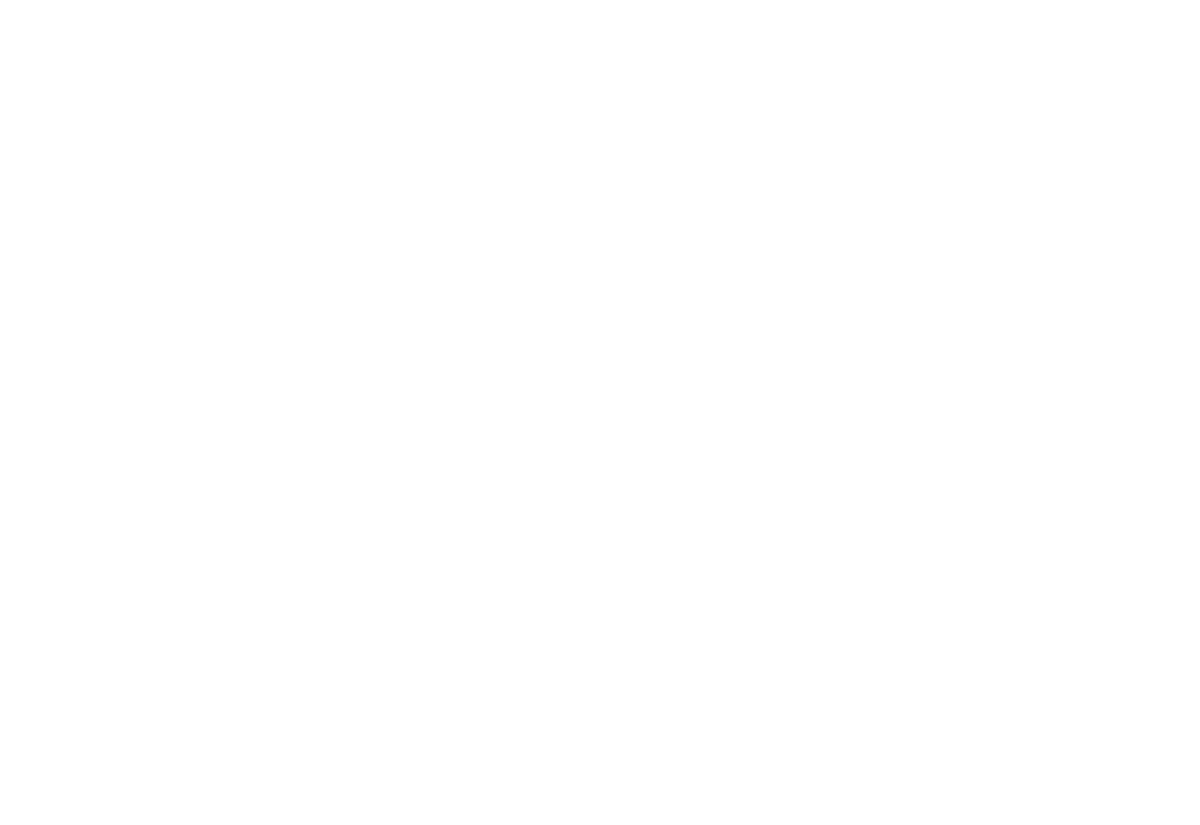

In [15]:
df_date_count = df1.groupby("Months").count()

trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="black", label="Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol, trans_vol, n_points), c="r", label="Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Months")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()
plt.show()

c:\users\monis\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

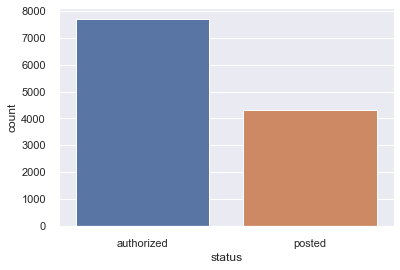

In [16]:
import seaborn as sns
%matplotlib inline

sns.set_theme(style="darkgrid")
sns.countplot(df1['status'],data=df1)

<AxesSubplot:xlabel='age', ylabel='count'>

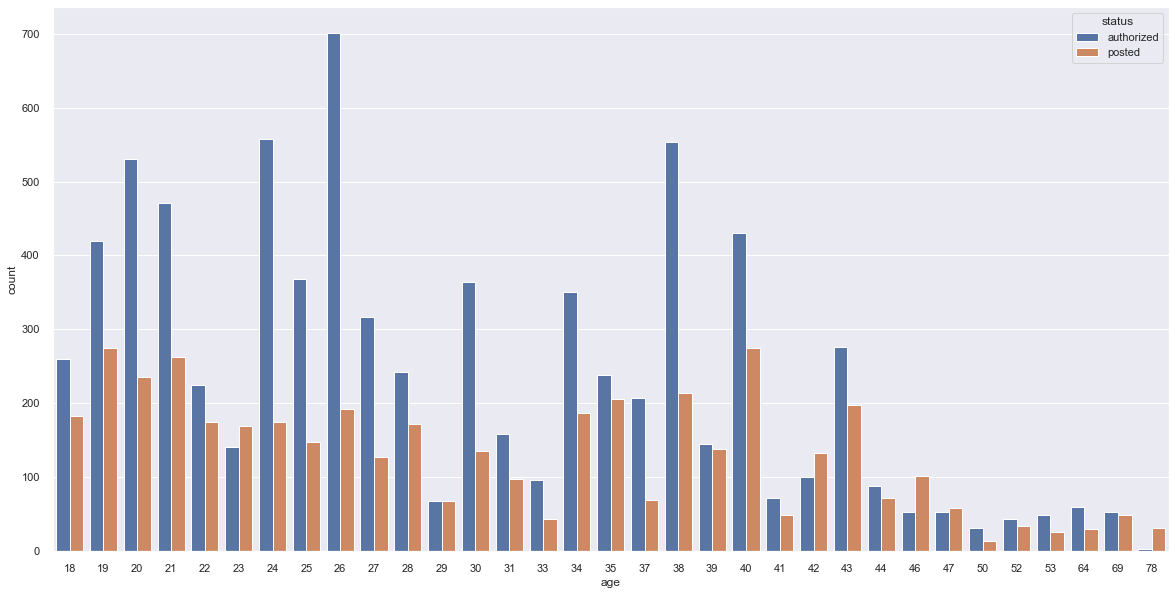

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='age',hue='status',data=df1)

c:\users\monis\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='merchant_state', ylabel='count'>

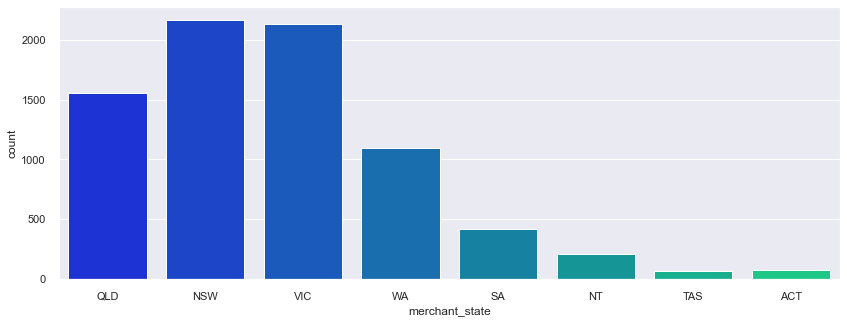

In [18]:
plt.figure(figsize = (14, 5))
sns.countplot(df1['merchant_state'], palette = 'winter')

In [19]:
long = []
lat = []

for i in df1['long_lat']:
    l=i.split()
    long.append(l[0])
    lat.append(l[1])

    

In [20]:
df1['longitude'] = long
df1['latitude'] = lat

In [22]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df1, geometry=geopandas.points_from_xy(df1.longitude, df1.latitude))

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Australia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()